# Time-Series-National-demand-supply factors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pylab import rcParams
from datetime import datetime,timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 Importing required libraries and loading the dataset.
 

In [2]:
#Data preparation

In [3]:
import pandas as pd
df=pd.read_csv("C:/Users/Shaheen Khanam/Downloads/CSUSHPISA.csv")
df.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.132
4,1987-05-01,65.565


In [4]:
df.tail()

,DATE,CSUSHPISA
421,2022-02-01,290.371
422,2022-03-01,296.362
423,2022-04-01,301.409
424,2022-05-01,305.179
425,2022-06-01,306.181


In [5]:
df.shape

(426, 2)

In [6]:
df.dtypes

DATE          object
CSUSHPISA    float64
dtype: object

In [7]:
date=pd.date_range(start='1/1/1987',end='8/1/2022',freq='M')
date

DatetimeIndex(['1987-01-31', '1987-02-28', '1987-03-31', '1987-04-30',
               '1987-05-31', '1987-06-30', '1987-07-31', '1987-08-31',
               '1987-09-30', '1987-10-31',
               ...
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31'],
              dtype='datetime64[ns]', length=427, freq='M')

In [8]:
df['Time_stamp']=pd.DataFrame(date)
df=df.set_index('Time_stamp')
df.head()

,DATE,CSUSHPISA
Time_stamp,,
1987-01-31,1987-01-01,63.965
1987-02-28,1987-02-01,64.424
1987-03-31,1987-03-01,64.735
1987-04-30,1987-04-01,65.132
1987-05-31,1987-05-01,65.565


In [9]:
df.tail()

,DATE,CSUSHPISA
Time_stamp,,
2022-02-28,2022-02-01,290.371
2022-03-31,2022-03-01,296.362
2022-04-30,2022-04-01,301.409
2022-05-31,2022-05-01,305.179
2022-06-30,2022-06-01,306.181


In [10]:
df1=df.drop(['DATE'],axis=1)

In [11]:
df1.head()

,CSUSHPISA
Time_stamp,
1987-01-31,63.965
1987-02-28,64.424
1987-03-31,64.735
1987-04-30,65.132
1987-05-31,65.565


In [12]:
df1.isnull().sum()

CSUSHPISA    0
dtype: int64

<AxesSubplot:xlabel='Time_stamp'>

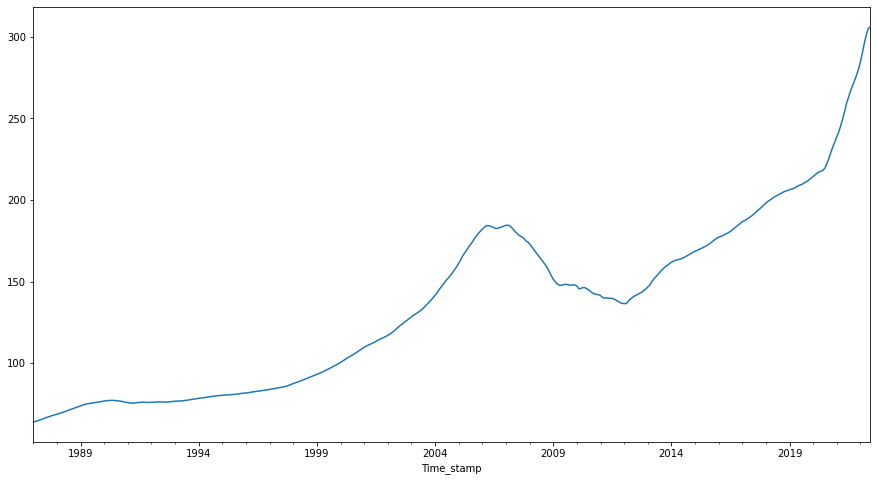

In [13]:
rcParams['figure.figsize']=15,8
df1['CSUSHPISA'].plot()

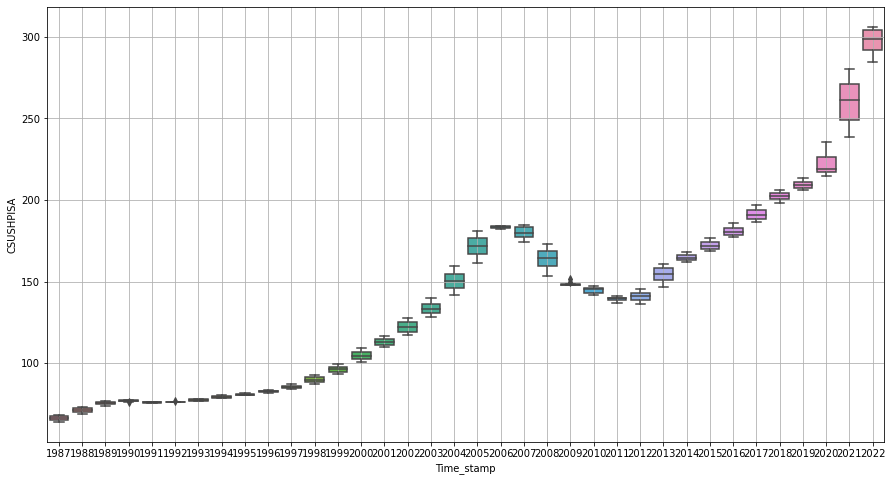

In [14]:
sns.boxplot(x=df1.index.year,y=df1['CSUSHPISA'])
plt.grid();

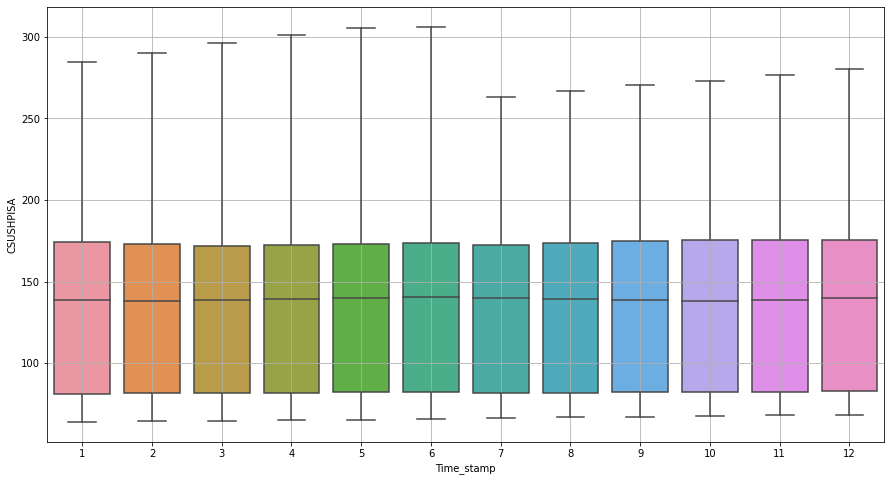

In [15]:
sns.boxplot(x=df1.index.month,y=df1['CSUSHPISA'])
plt.grid();

In [16]:
#Data understanding

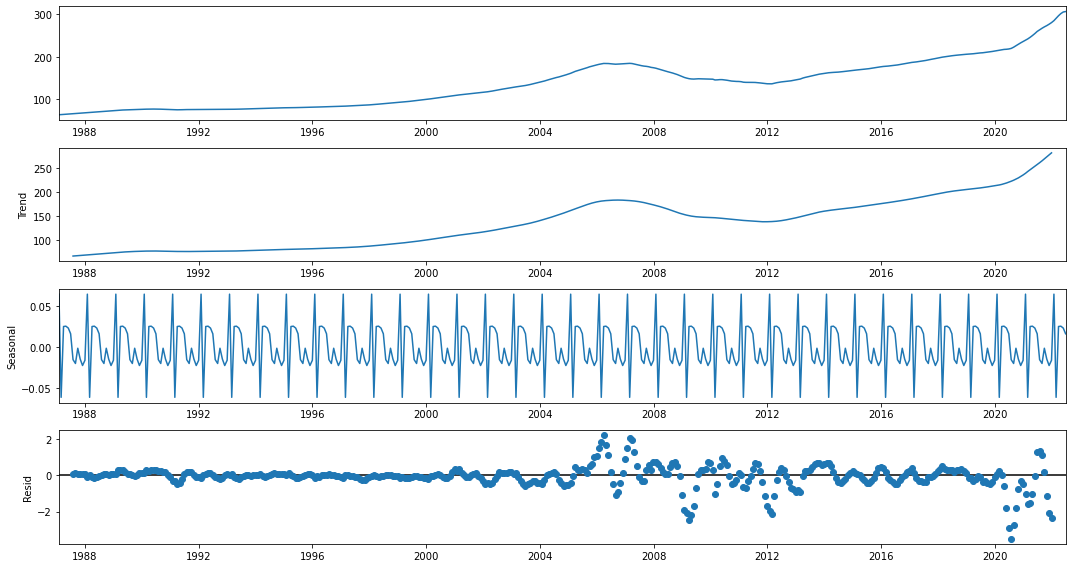

In [17]:
decomp=seasonal_decompose(df1,model='additive')
decomp.plot()
plt.show()


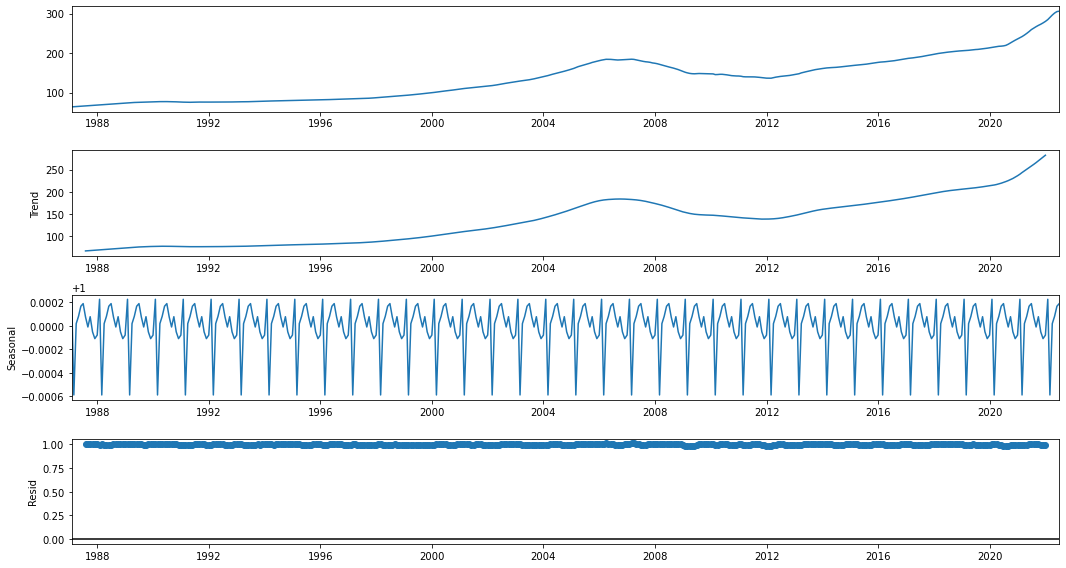

In [18]:
decomp=seasonal_decompose(df1,model='multiplicative')
decomp.plot()
plt.show()

In [19]:
yearly_mean=df1.resample('Y').mean()

<AxesSubplot:xlabel='Time_stamp'>

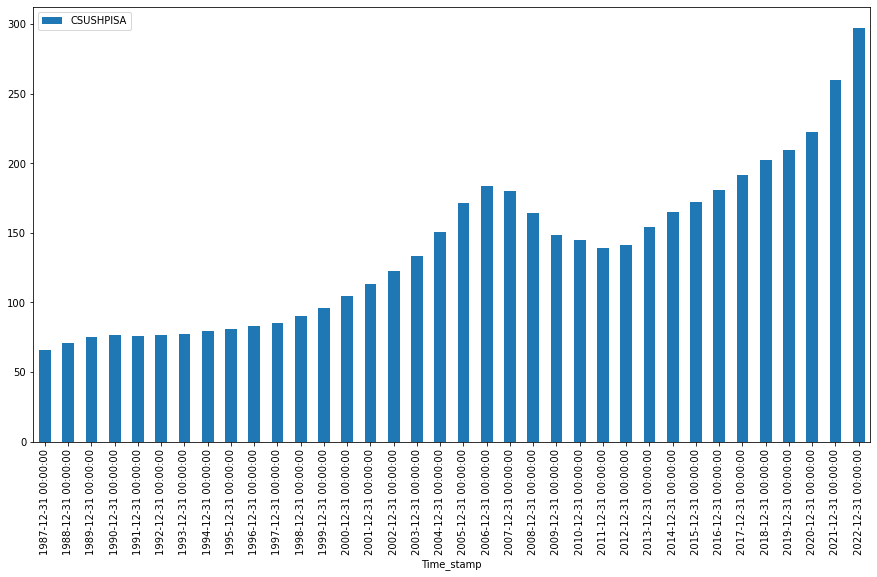

In [20]:
yearly_mean.plot.bar()

In [21]:
rolmean=df1.rolling(window=15).mean()
rolstd=df1.rolling(window=15).std()

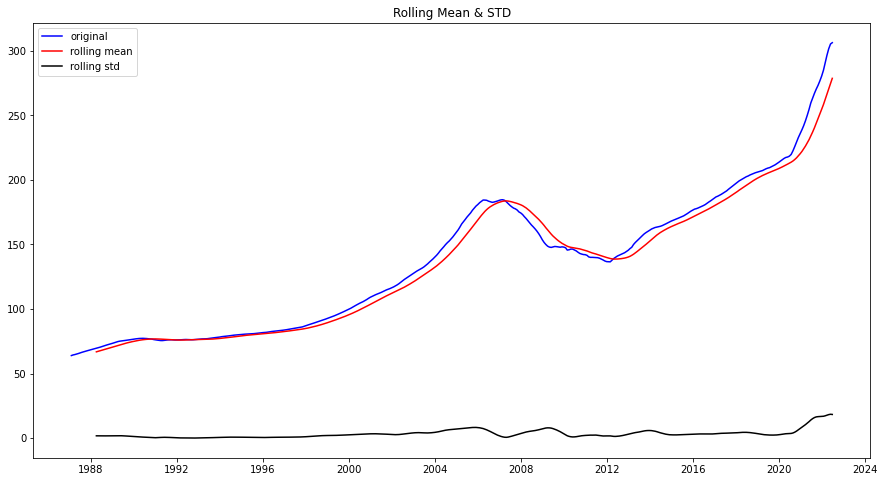

In [22]:
orig=plt.plot(df1,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
plt.show()


In [23]:
obs=df1['CSUSHPISA']
test_result=adfuller(obs)

In [24]:
print('ADF Statistic:%f' %test_result[0]) #(ADF Test) is a common statistical test used to test whether a given Time series is stationary or not
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
    print('\t%s: %5f'% (key, value))

ADF Statistic:0.837283
p-value: 0.992215
Critical Values:
	1%: -3.446520
	5%: -2.868668
	10%: -2.570567


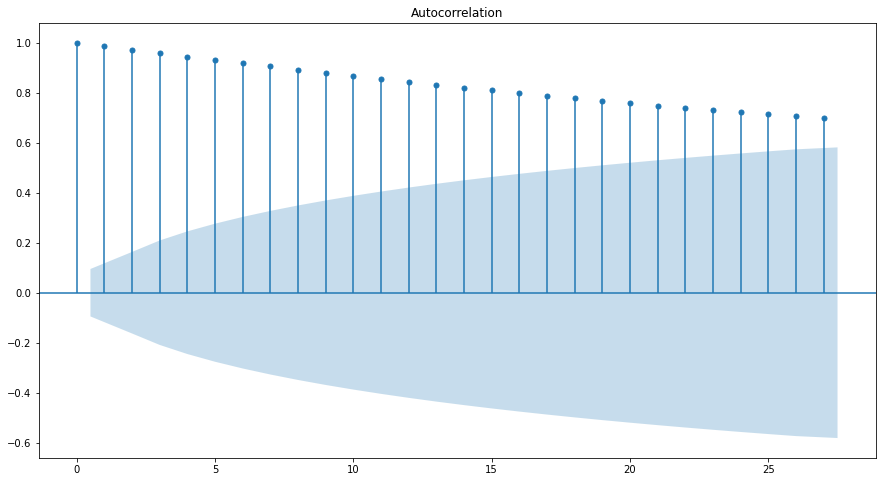

In [25]:
plot_acf(df1);

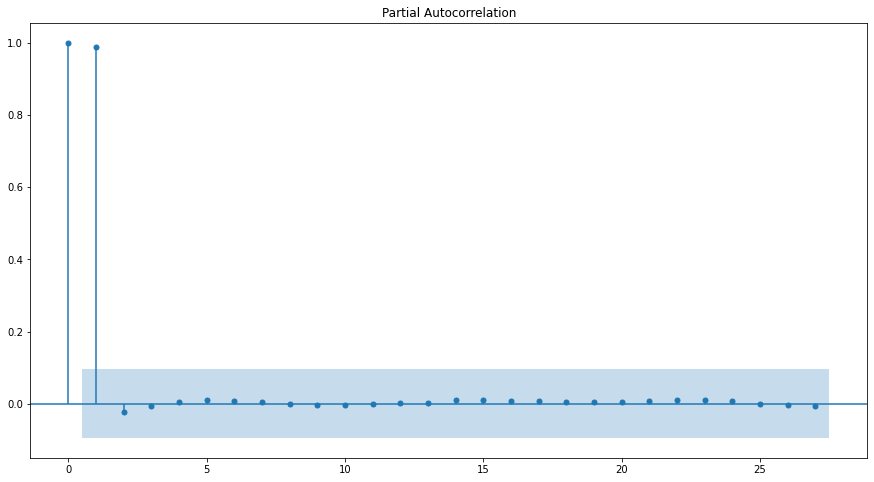

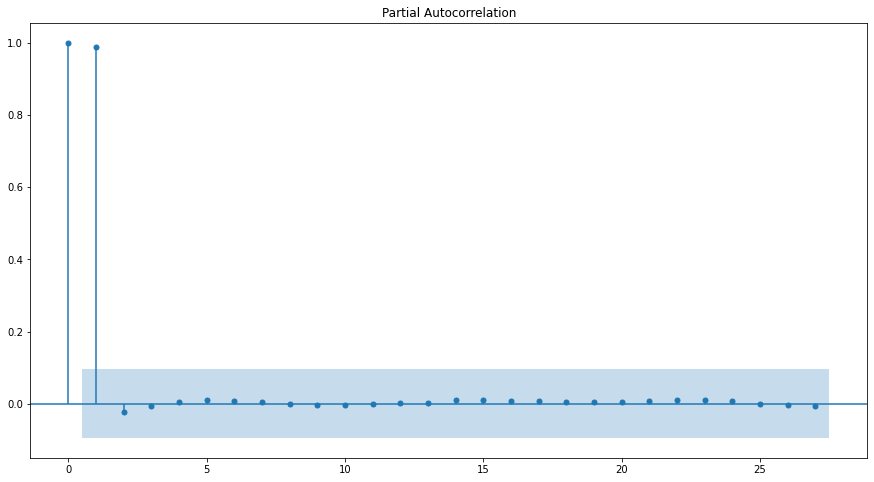

In [28]:
plot_pacf(df1)


In [29]:
train_end=datetime(2021,1,31)
test_end=datetime(2022,1,31)

In [30]:
train=df1[:train_end]
test=df1[train_end + timedelta(days=1):test_end]

In [31]:
train.shape

(409, 1)

In [32]:
test.shape

(12, 1)

In [ ]:
#Model Building

In [33]:
#Itertool is a module that provides various functions that work on iterators to produce complex iterators.
import itertools
p=q=range(0,2)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
model_pdq=[(x[0],x[1],x[2],7) for x in list(itertools.product(p,d,q))]
print('examples of parameter combinations for model...')
print('Model: {}{}'.format(pdq[1],model_pdq[1]))
print('Model: {}{}'.format(pdq[1],model_pdq[2]))
print('Model: {}{}'.format(pdq[2],model_pdq[3]))
print('Model: {}{}'.format(pdq[2],model_pdq[4]))

examples of parameter combinations for model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


In [34]:
model_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [35]:
dfObj1=pd.DataFrame(columns=['param','AIC'])
dfObj1

,param,AIC


In [36]:
for param in pdq:
    try:
        mod=ARIMA(train, order=param)
        results_Arima=mod.fit()
        print('ARIMA{}-AIC:{}'.format(param,results_Arima.aic))
        dfObj1=dfObj1.append({'param':param, 'AIC': results_Arima.aic},ignore_index=True)
        
    except:
        continue

ARIMA(0, 0, 0)-AIC:4315.211968593138
ARIMA(0, 0, 1)-AIC:3762.2480709428874
ARIMA(0, 1, 0)-AIC:980.2674538075856
ARIMA(0, 1, 1)-AIC:618.3401777879938
ARIMA(1, 0, 0)-AIC:1107.1139658582056
ARIMA(1, 1, 0)-AIC:80.01719694703911
ARIMA(1, 1, 1)-AIC:81.83900890080395


In [37]:
model=ARIMA(train,order=(1,1,1))
model_Arima=model.fit()
print(model_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.CSUSHPISA   No. Observations:                  408
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -36.920
Method:                       css-mle   S.D. of innovations              0.264
Date:                Wed, 21 Sep 2022   AIC                             81.839
Time:                        10:19:21   BIC                             97.884
Sample:                    02-28-1987   HQIC                            88.188
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5472      0.267      2.048      0.041       0.023       1.071
ar.L1.D.CSUSHPISA     0.9518      0.017     55.237      0.000       0.918       0.986
ma.L1.D.CSUSHPISA     0.

In [38]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [39]:
ARIMA_pred=model_Arima.predict(start=pred_start,end=pred_end)

In [40]:
forecast=model_Arima.forecast(len(test))

In [42]:
ARIMA_pred=ARIMA_pred.cumsum()
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [43]:
df2=ARIMA_pred.copy()
columns=train.columns
for col in columns:
    df2[str(col)+'_forecast']=train[col].iloc[-1]+df2[str(col)]

In [45]:
df2.head()

,CSUSHPISA,CSUSHPISA_forecast
2021-02-28,2.960977,241.816977
2021-03-31,5.805517,244.661517
2021-04-30,8.539236,247.395236
2021-05-31,11.167480,250.023480
2021-06-30,13.695337,252.551337


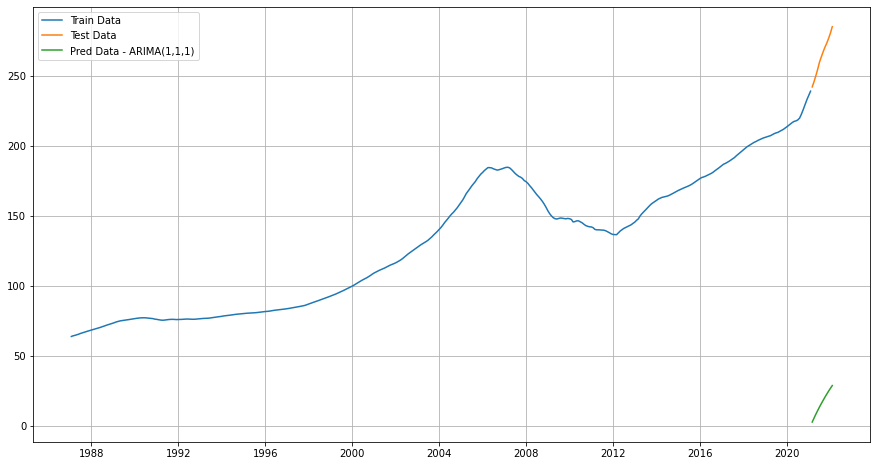

In [46]:
plt.plot(train,label='Train Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df2['CSUSHPISA'],label='Pred Data - ARIMA(1,1,1)')
plt.legend(loc='best')
plt.grid();

In [47]:
residuals=test.CSUSHPISA - df2['CSUSHPISA_forecast']

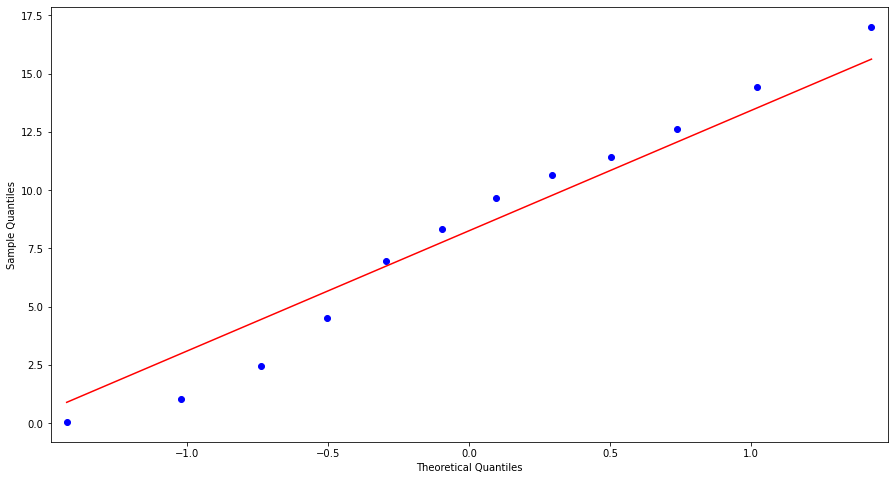

In [48]:
qqplot(residuals,line='s');


<AxesSubplot:ylabel='Density'>

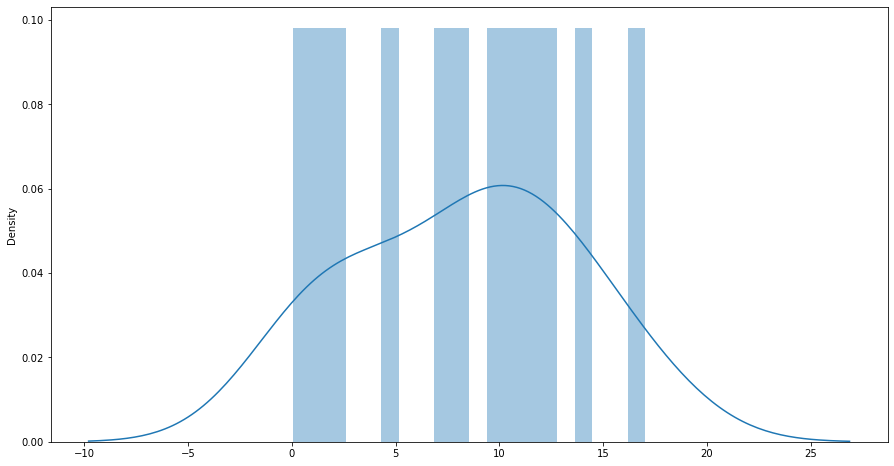

In [49]:
sns.distplot(residuals,bins=20)

In [50]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test.CSUSHPISA,df2['CSUSHPISA_forecast']))
print(rmse)

9.742792131462494


In [51]:
def MAPE(y_true,y_pred):  # mean absolute percentage error 
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [53]:
mape=MAPE(test['CSUSHPISA'].values,df2['CSUSHPISA_forecast'].values)
print(mape)

3.0390739054902816


In [54]:
result=pd.DataFrame({'Test RMSE ': rmse,'Test MAPE':mape},index=['ARIMA(1,1,1)'])
result

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",9.742792,3.039074


In [ ]:
#Since the RMSE is only 9 , it is good.

In [55]:
import itertools
p=q=range(0,2)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
model_pdq=[(x[0],x[1],x[2],7) for x in list(itertools.product(p,d,q))]
print('examples of parameter combinations for model...')
print('Model: {}{}'.format(pdq[1],model_pdq[1]))
print('Model: {}{}'.format(pdq[1],model_pdq[2]))
print('Model: {}{}'.format(pdq[2],model_pdq[3]))
print('Model: {}{}'.format(pdq[2],model_pdq[4]))

examples of parameter combinations for model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


In [56]:
model_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [57]:
dfObj2=pd.DataFrame(columns=['param','AIC'])
dfObj2

,param,AIC


In [58]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod=sm.tsa.statespace.SARIMAX(train,order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
        results_SARIMA=mod.fit()
        print('SARIMA{}x{}7 - AIC{}'.format(param,param_seasonal, results_SARIMA.aic))
        dfObj2=dfObj2.append({'param':param,'seasonal':param_seasonal,'AIC':results_SARIMA.aic},ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC5185.805931687553
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC5111.529528774725
SARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC2546.556659855463
SARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC2215.014367388982
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC2431.6611169755274
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC2163.8736267635686
SARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC1992.8210812727784
SARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC1978.3816504201425
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC4619.586425395193
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC5134.857737874898
SARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC2036.06563629595
SARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC1787.2123338973543
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC1929.505296317724
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC1729.6678523096355
SARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC1564.9257538982524
SARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC1557.8463356753477
SARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC1079.2312089351612
SARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC887.2989861589033
SARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC764

In [59]:
dfObj2.sort_values(by=['AIC'])

,param,AIC,seasonal
48,"(1, 1, 0)",79.118711,"(0, 0, 0, 7)"
56,"(1, 1, 1)",81.596541,"(0, 0, 0, 7)"
49,"(1, 1, 0)",82.706584,"(0, 0, 1, 7)"
52,"(1, 1, 0)",82.827676,"(1, 0, 0, 7)"
53,"(1, 1, 0)",84.710382,"(1, 0, 1, 7)"
...,...,...,...
2,"(0, 0, 0)",2546.556660,"(0, 1, 0, 7)"
8,"(0, 0, 1)",4619.586425,"(0, 0, 0, 7)"
1,"(0, 0, 0)",5111.529529,"(0, 0, 1, 7)"
9,"(0, 0, 1)",5134.857738,"(0, 0, 1, 7)"


In [60]:
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),
                                      seasonal_order=(1,1,1,7),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
model_Sarima=model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         CSUSHPISA   No. Observations:                  409
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -50.452
Date:                           Wed, 21 Sep 2022   AIC                            110.903
Time:                                   10:41:16   BIC                            130.760
Sample:                               01-31-1987   HQIC                           118.773
                                    - 01-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9625      0.015     62.336      0.000       0.932       0.993
ma.L1          0.0237      0.034      0.693

In [61]:
SARIMA_pred=model_Sarima.predict(start=pred_start,end=pred_end)

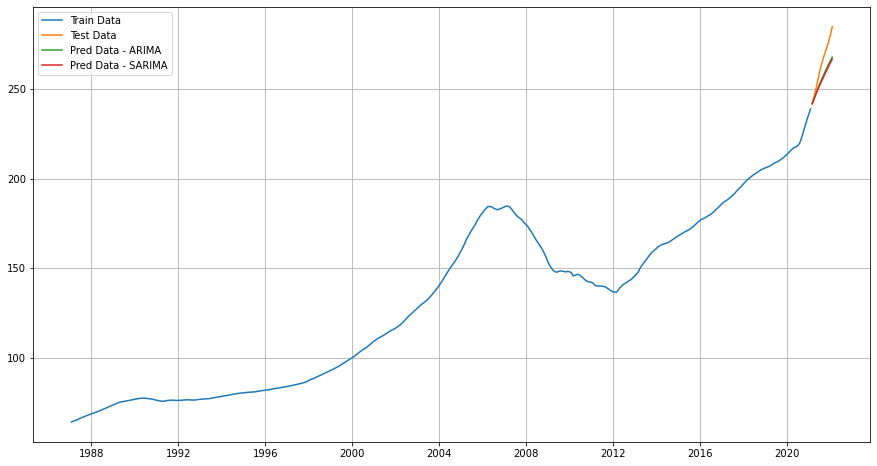

In [62]:
plt.plot(train,label='Train Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df2['CSUSHPISA_forecast'],label='Pred Data - ARIMA')
plt.plot(test.index,SARIMA_pred,label='Pred Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [63]:
rmse=sqrt(mean_squared_error(test.CSUSHPISA,SARIMA_pred))
print(rmse)

10.619151527882075


In [64]:
mape=MAPE(test['CSUSHPISA'].values,SARIMA_pred)
print(mape)

3.340196442450557


In [65]:
result_sarima=pd.DataFrame({'Test RMSE ': rmse,'Test MAPE':mape},index=['SARIMA(1,1,1)(1,1,1,7)'])
resultdf=pd.concat([result,result_sarima])
resultdf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",9.742792,3.039074
"SARIMA(1,1,1)(1,1,1,7)",10.619152,3.340196


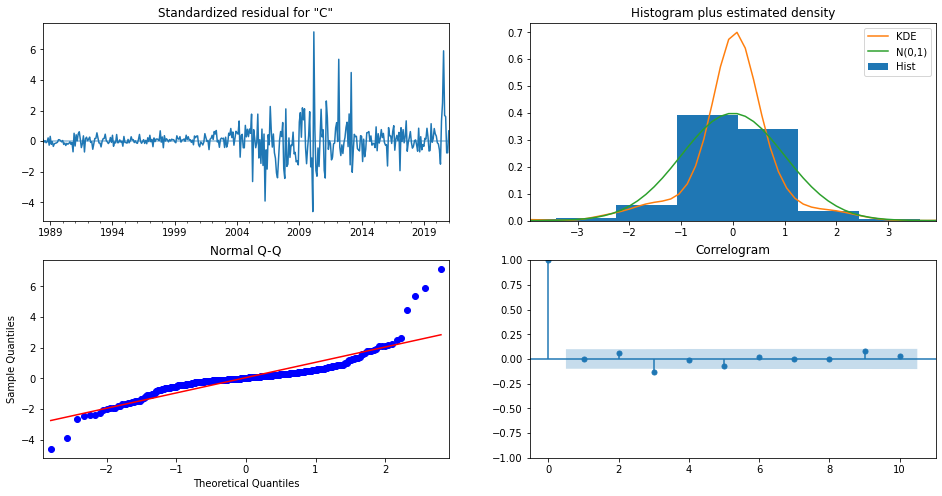

In [66]:
model_Sarima.plot_diagnostics(figsize=(16,8))
plt.show()


In [67]:
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive')

In [68]:
model_TES=model_TES.fit(optimized=True)
model_TES.summary()

Dep. Variable:,CSUSHPISA,No. Observations:,409
Model:,ExponentialSmoothing,SSE,26.719
Optimized:,True,AIC,-1083.887
Trend:,Additive,BIC,-1019.668
Seasonal:,Additive,AICC,-1082.133
Seasonal Periods:,12,Date:,"Wed, 21 Sep 2022"
Box-Cox:,False,Time:,10:46:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.0000000,beta,True


In [70]:
TES_pred=model_TES.forecast(len(test))

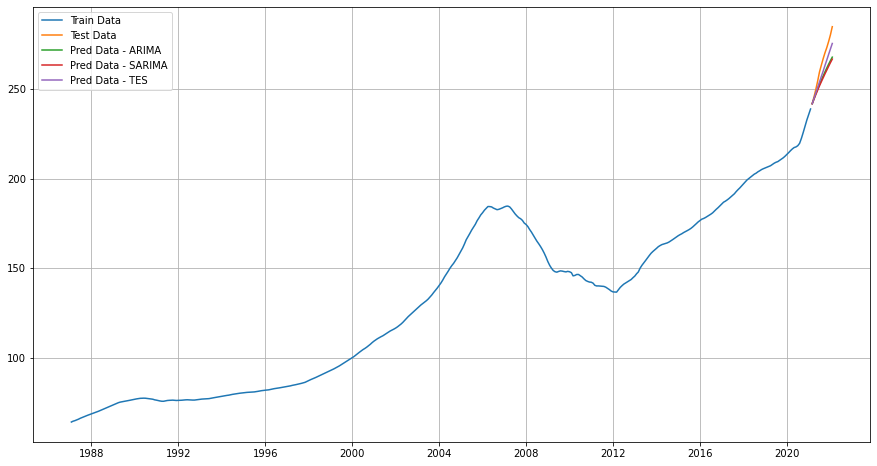

In [71]:
plt.plot(train,label='Train Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df2['CSUSHPISA_forecast'],label='Pred Data - ARIMA')
plt.plot(test.index,SARIMA_pred,label='Pred Data - SARIMA')
plt.plot(test.index,TES_pred,label='Pred Data - TES')
plt.legend(loc='best')
plt.grid();


In [72]:
rmse=sqrt(mean_squared_error(test.CSUSHPISA,TES_pred))
print(rmse)

6.026341948446242


In [73]:
mape=MAPE(test['CSUSHPISA'].values,TES_pred.values)
print(mape)

1.9591608305282453


TES model has the least rmse when compared to other models so it is the best model.

In [74]:
forecast=model_TES.forecast(50)
forecast

2021-02-28    241.796410
2021-03-31    244.921599
2021-04-30    247.954190
2021-05-31    250.971417
2021-06-30    253.977878
2021-07-31    256.993005
2021-08-31    260.045815
2021-09-30    263.143018
2021-10-31    266.222215
2021-11-30    269.299570
2021-12-31    272.376875
2022-01-31    275.456875
2022-02-28    278.397286
2022-03-31    281.522475
2022-04-30    284.555066
2022-05-31    287.572292
2022-06-30    290.578754
2022-07-31    293.593880
2022-08-31    296.646691
2022-09-30    299.743893
2022-10-31    302.823091
2022-11-30    305.900445
2022-12-31    308.977751
2023-01-31    312.057751
2023-02-28    314.998161
2023-03-31    318.123350
2023-04-30    321.155941
2023-05-31    324.173168
2023-06-30    327.179629
2023-07-31    330.194756
2023-08-31    333.247566
2023-09-30    336.344769
2023-10-31    339.423966
2023-11-30    342.501321
2023-12-31    345.578626
2024-01-31    348.658626
2024-02-29    351.599037
2024-03-31    354.724226
2024-04-30    357.756817
2024-05-31    360.774043
